In [417]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
import re
import scipy.io as scio
import os
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (8, 6)
%config InlineBackend.figure_format = 'retina'

In [126]:
path_to_mrm = 'mrm_data/'
path_to_aepw3 = '../pazy-aepw3-results/'

In [597]:
file_names = {}
file_names['0'] = {'mrm': 'AE results from MRM of UM beam model wing 1 WO skin updated',
                  'results': 'mrm_umbeam_wo_skin'}
file_names['1'] = {'mrm': 'AE results from MRM of UM beam model wing 1 W skin ea at 44',
                  'results': 'mrm_umbeam_w_skin'}
file_names['2'] = {'mrm': 'AE results from MRM of Nastran model wing 1',
                  'results': 'mrm_nastran'}
file_names['3'] = {'mrm': 'AE results from MRM of Nastran model wing 1 with weight',
                  'results': 'mrm_nastran_te1'}
file_names['4'] = {'mrm': 'AE results from MRM of UM beam model wing 1 W skin improved QHH',
                  'results': 'mrm_umbeam_w_skin_qhh'}
file_names['5'] = {'mrm': 'AE results from MRM of UM beam model wing 1 WO skin improved QHH',
                  'results': 'mrm_umbeam_wo_skin_qhh'}
file_names['6'] = {'mrm': 'AE results from MRM of UM beam model wing 1 WO skin refined',
                  'results': 'mrm_umbeam_wo_skin_refined'}
file_names['7'] = {'mrm': 'AE results from MRM of UM beam model wing 1 W skin refined',
                  'results': 'mrm_umbeam_w_skin_refined'}
file_names['8'] = {'mrm': 'torsion_test_W_skin',
                   'results': 'torsion_mrm_umbeam_w_skin'}
file_names['9'] = {'mrm': 'torsion_test_WO_skin',
                   'results': 'torsion_mrm_umbeam_wo_skin'}
file_names['10'] = {'mrm': 'bending_test_WO_skin',
                   'results': 'bending_mrm_umbeam_wo_skin'}
file_names['11'] = {'mrm': 'bending_test_W_skin',
                   'results': 'bending_mrm_umbeam_w_skin'}
file_names['12'] = {'mrm': 'Structural_Test_Torsion__UM_based_MRM',
                   'results': 'torsion_mrm_umbeam_wo_skin'}
file_names['13'] = {'mrm': 'follower_force_W_skin_UM_beam',
                   'results': 'mrm_followerforce_skin1'}
file_names['14'] = {'mrm': 'aeroelastic_analysis_W_skin_UM_beam',
                   'results': 'mrm_umbeam_w_skin'}
file_names['15'] = {'mrm': 'aeroelastic_analysis_WO_skin_UM_beam',
                   'results': 'mrm_umbeam_wo_skin'}
file_names['16'] = {'mrm': 'follower_force_WO_skin_UM_beam',
                   'results': 'mrm_followerforce_skin0'}

In [598]:
torsion_cases = [8, 9]
bending_cases = [10, 11]
followerforce_cases = [13, 16]
aeroelastic_cases = [14, 15]

In [616]:
mat = scio.loadmat(path_to_mrm + file_names['11']['mrm'] + '.mat')

In [617]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Norberto_Struct_Analysis_Data', 'Norberto_Struct_Test_Data'])

In [602]:
for k, v in mat.items():
    print('\n\n---------------------')
    print('Key:', k)
    try:
        print('Shape: ', v.shape)
#         print(v)
    except AttributeError:
        pass



---------------------
Key: __header__


---------------------
Key: __version__


---------------------
Key: __globals__


---------------------
Key: Norberto_Static_AE_Data
Shape:  (21, 1)


---------------------
Key: Norberto_frequency_Data
Shape:  (21, 4)


---------------------
Key: Norberto_frequency_Data_Direct
Shape:  (21, 4)


---------------------
Key: Norberto_weight_data
Shape:  (1, 21)


---------------------
Key: norberto_deformed_shape
Shape:  (1, 750)


# Bending

In [556]:
def bending(mat, data_type):
    if data_type == 'mrm':
        load = mat['Norberto_Struct_Analysis_Data'][:, 0]
        deflection = mat['Norberto_Struct_Analysis_Data'][:, 1]
    else:
        load = mat['Norberto_Struct_Test_Data'][:, 0]
        deflection = mat['Norberto_Struct_Test_Data'][:, 1]
    # modes_freq = mat['Norberto_frequency_Data']
    return load, deflection

In [557]:
for file_num in bending_cases:
    mat = scio.loadmat(path_to_mrm + '/' + file_names[str(file_num)]['mrm'] + '.mat')
    print('Processing {:s}'.format(file_names[str(file_num)]['mrm']))
    
    load, deflection = bending(mat, 'mrm')
    output_path = path_to_aepw3 + '/01_Bending/'
    np.savetxt(output_path + file_names[str(file_num)]['results'] + '.txt', np.column_stack((load, deflection)))
    
    load, deflection = bending(mat, 'exp')
    output_path = path_to_aepw3 + '/01_Bending/'
    if '_w_skin' in file_names[str(file_num)]['results']:
        filename = 'bending_technion_experimental_w_skin'
    else:
        filename = 'bending_technion_experimental_wo_skin'

    np.savetxt(output_path + filename + '.txt', np.column_stack((load, deflection)))
    
#     modes_output = path_to_aepw3 + '/04_DeformedModal/'
#     if not os.path.isdir(modes_output + '/' + file_names[str(file_num)]['results']):
#         os.makedirs(modes_output + '/' + file_names[str(file_num)]['results'])
    
#     for i in range(modes_freq.shape[1]):
#         np.savetxt(modes_output + '/' + file_names[str(file_num)]['results'] + '/mode_{:02g}.txt'.format(i),
#                   np.column_stack((load, deflection, modes_freq[:, i] * 2 * np.pi)))

Processing bending_test_WO_skin
Processing bending_test_W_skin


# Torsion

In [565]:
def torsion(mat, data_type):
    if data_type == 'mrm':
        load = mat['Norberto_Struct_Analysis_Data'][:, 0]
        deflection = mat['Norberto_Struct_Analysis_Data'][:, 1]
        angle = mat['Norberto_Struct_Analysis_Data'][:, 2]
    else:
        load = mat['Norberto_Struct_Test_Data'][:, 0]
        deflection = mat['Norberto_Struct_Test_Data'][:, 1]
        angle = mat['Norberto_Struct_Test_Data'][:, 2]


    # modes_freq = mat['Norberto_frequency_Data']
    return load, deflection, angle

In [567]:
for file_num in torsion_cases:
    mat = scio.loadmat(path_to_mrm + '/' + file_names[str(file_num)]['mrm'] + '.mat')
    print('Processing {:s}'.format(file_names[str(file_num)]['mrm']))
    
    load, deflection, angle = torsion(mat, 'mrm')
    output_path = path_to_aepw3 + '/02_Torsion/'
    np.savetxt(output_path + file_names[str(file_num)]['results'] + '.txt', np.column_stack((load, deflection, angle)))
    
    load, deflection, angle = torsion(mat, 'exp')
    if '_w_skin' in file_names[str(file_num)]['results']:
        filename = 'torsion_technion_experimental_w_skin'
    else:
        filename = 'torsion_technion_experimental_wo_skin'

    np.savetxt(output_path + filename + '.txt', np.column_stack((load, deflection, angle)))

Processing torsion_test_W_skin
Processing torsion_test_WO_skin


# Follower Force

WIP - few things to check before

In [614]:
def follower_force(mat, direct=False):
    load = mat['Norberto_weight_data']
    mode_data = []
    n_modes = mat['Norberto_frequency_Data'].shape[1]
    
    for i_mode in range(n_modes):
        if direct:
            freq = mat['Norberto_frequency_Data_Direct'][:, i_mode]
        else:
            freq = mat['Norberto_frequency_Data'][:, i_mode]
        data = np.column_stack((load.T * 9.81, mat['Norberto_Static_AE_Data'], freq * 2 * np.pi))
        mode_data.append(data)
        
    return mode_data

In [615]:
for file_num in followerforce_cases:
    mat = scio.loadmat(path_to_mrm + '/' + file_names[str(file_num)]['mrm'] + '.mat')
    print('Processing {:s}'.format(file_names[str(file_num)]['mrm']))
    
    # Modal approach
    mode_data = follower_force(mat)
    output_path = path_to_aepw3 + '/04_DeformedModal/' + '/' + file_names[str(file_num)]['results']
    os.makedirs(output_path, exist_ok=True)
    for i_mode in range(len(mode_data)):
        np.savetxt(output_path + '/mode_{:02g}.txt'.format(i_mode), mode_data[i_mode])
    
    # Direct
    mode_data = follower_force(mat, direct=True)
    output_path = path_to_aepw3 + '/04_DeformedModal/' + '/' + file_names[str(file_num)]['results'] + '_direct'
    os.makedirs(output_path, exist_ok=True)
    for i_mode in range(len(mode_data)):
        np.savetxt(output_path + '/mode_{:02g}.txt'.format(i_mode), mode_data[i_mode])

Processing follower_force_W_skin_UM_beam
Processing follower_force_WO_skin_UM_beam


In [443]:
k_vec = np.array([0, 0.0200000000000000, 0.0300000000000000, 0.0400000000000000, 0.0500000000000000, 0.0600000000000000, 0.0700000000000000, 0.100000000000000,
                  0.120000000000000, 0.125000000000000, 0.130000000000000, 0.140000000000000, 0.150000000000000, 0.200000000000000, 0.250000000000000,
                  0.300000000000000, 0.400000000000000, 0.500000000000000, 0.600000000000000, 0.700000000000000, 0.800000000000000, 0.900000000000000, 1, 1.50000000000000])

print('Length k', len(k_vec))

Length k 24


In [422]:
def frequency(mat, i_aoa):
    vels = []
    freqs = []
    for i in range(4):
#         plt.scatter(mat['Norberto_Vel_Data'][:, 0], mat['Norberto_frequency_Data'][:, i, 0])
        vels.append(mat['Norberto_Vel_Data'][:, 0].astype(float))
        freqs.append(mat['Norberto_frequency_Data'][:, i, i_aoa])
    vels = np.concatenate(vels)
    freqs = np.concatenate(freqs)
    order = np.argsort(vels)
    vels = np.array([vels[i] for i in order])
    freqs = np.array([freqs[i] for i in order])
#     print(vels)
#     print(freqs)
#     plt.scatter(vels, freqs)
    return vels, freqs

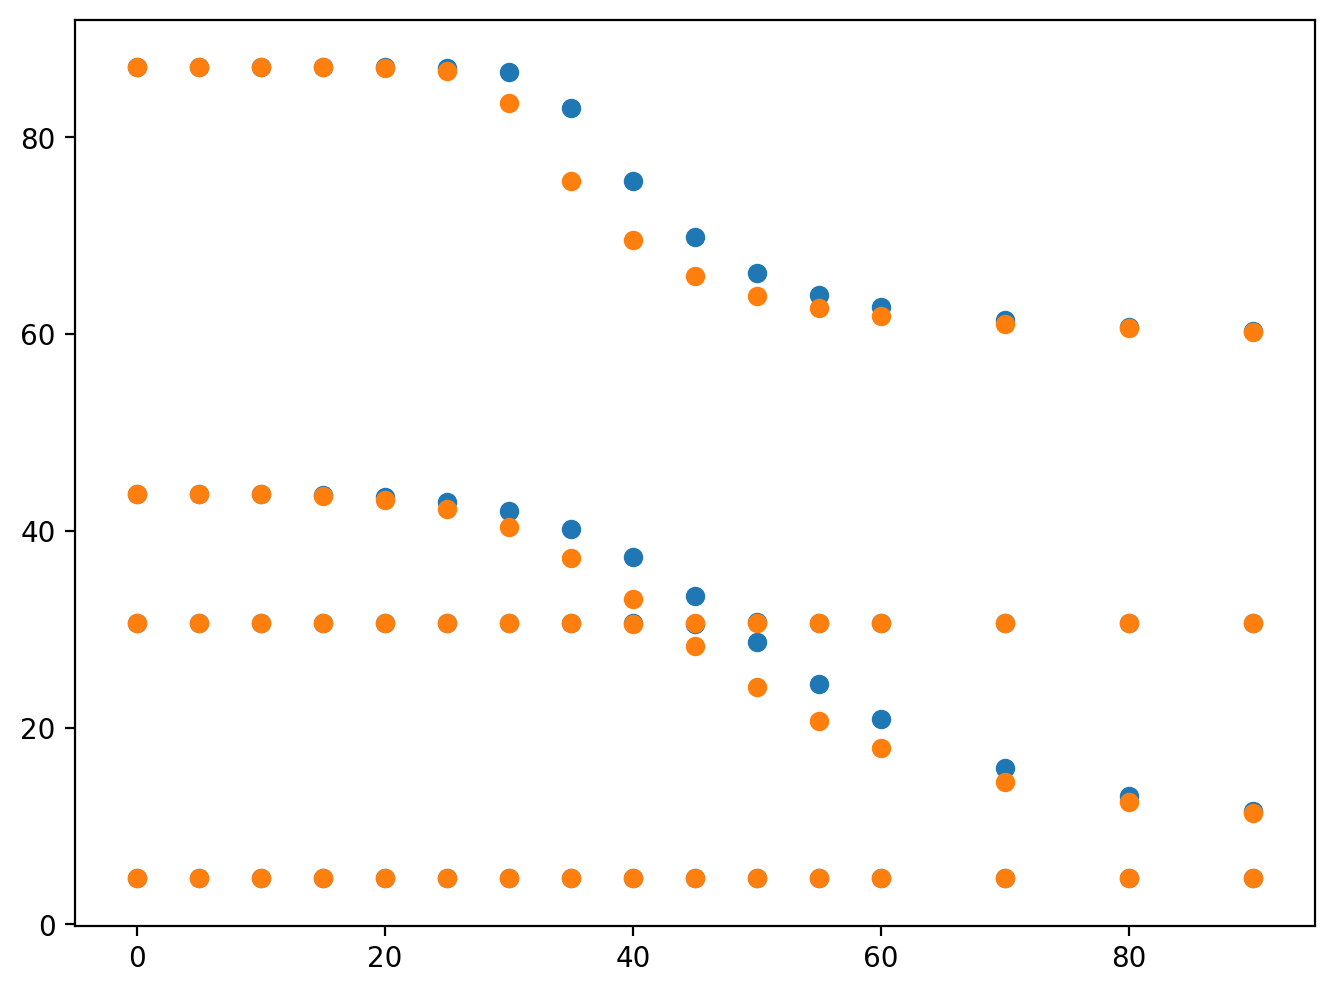

In [423]:
plt.scatter(*frequency(mat, 0))
plt.scatter(*frequency(mat, 1))

In [581]:
def static_deflection_speed(mat, i_aoa):
    vels = mat['Norberto_Vel_Data'][:, 0].astype(float)
    deflection = mat['Norberto_Static_AE_Data'][:, i_aoa]

    return vels, deflection

In [582]:
def matched_flutter(mat, i_aoa):
    if i_aoa is not None:
        deflection = mat['Norberto_Static_AE_Data'][:, i_aoa]
        vels = mat['Norberto_Vel_Data'][:, 0].astype(float)
        flutter_speed = mat['Norberto_vf_mached_Data'][0, i_aoa+1]
        deflection_at_vf = np.interp(flutter_speed, vels, deflection)
    
        return flutter_speed, deflection_at_vf
    else:
        return mat['Norberto_vf_mached_Data'][0, 0], 0

In [583]:
def nonmatched_flutter(mat, i_aoa):
    deflection = mat['Norberto_Static_AE_Data'][:, i_aoa]
    vels = mat['Norberto_Vel_Data'][:, 0].astype(float)
    flutter_speed = mat['Norberto_nonmached_flutter_Data'][:, 0, i_aoa]
#     deflection_at_vf = np.interp(flutter_speed, vels, deflection)
    return deflection, flutter_speed

In [584]:
def aero_freqresp(mat, aoa, i_aoa, path):
    mlist = [1, 2, 3]
    plist = [1, 2, 3]
    vels = mat['Norberto_Vel_Data'][:, 0].astype(float)
    
    for i_vel, vel in enumerate(vels):
        # print(vel)
        file_path = path + '_uinf{:04g}_alpha{:04g}'.format(vel * 10, aoa* 100)
        os.makedirs(file_path, exist_ok=True)
        for i_p, p in enumerate(plist):
            for i_m, m in enumerate(mlist):
                try:
                    raw_freq = mat['Norberto_Qhh{:g}{:g}_data'.format(p, m)]
                except KeyError:
#                     raw_freq = mat['Norberto_Qhh{:g}{:g}_data_eigen_coords'.format(p, m)]
                    raw_freq = mat['Norberto_Qhh{:g}{:g}_data_constnt_modes'.format(p, m)]



                np.savetxt(file_path + '/in{:02g}_out{:02g}.txt'.format(i_p, i_m), np.column_stack((k_vec, raw_freq[:, i_vel, i_aoa].real, raw_freq[:, i_vel, i_aoa].imag)))


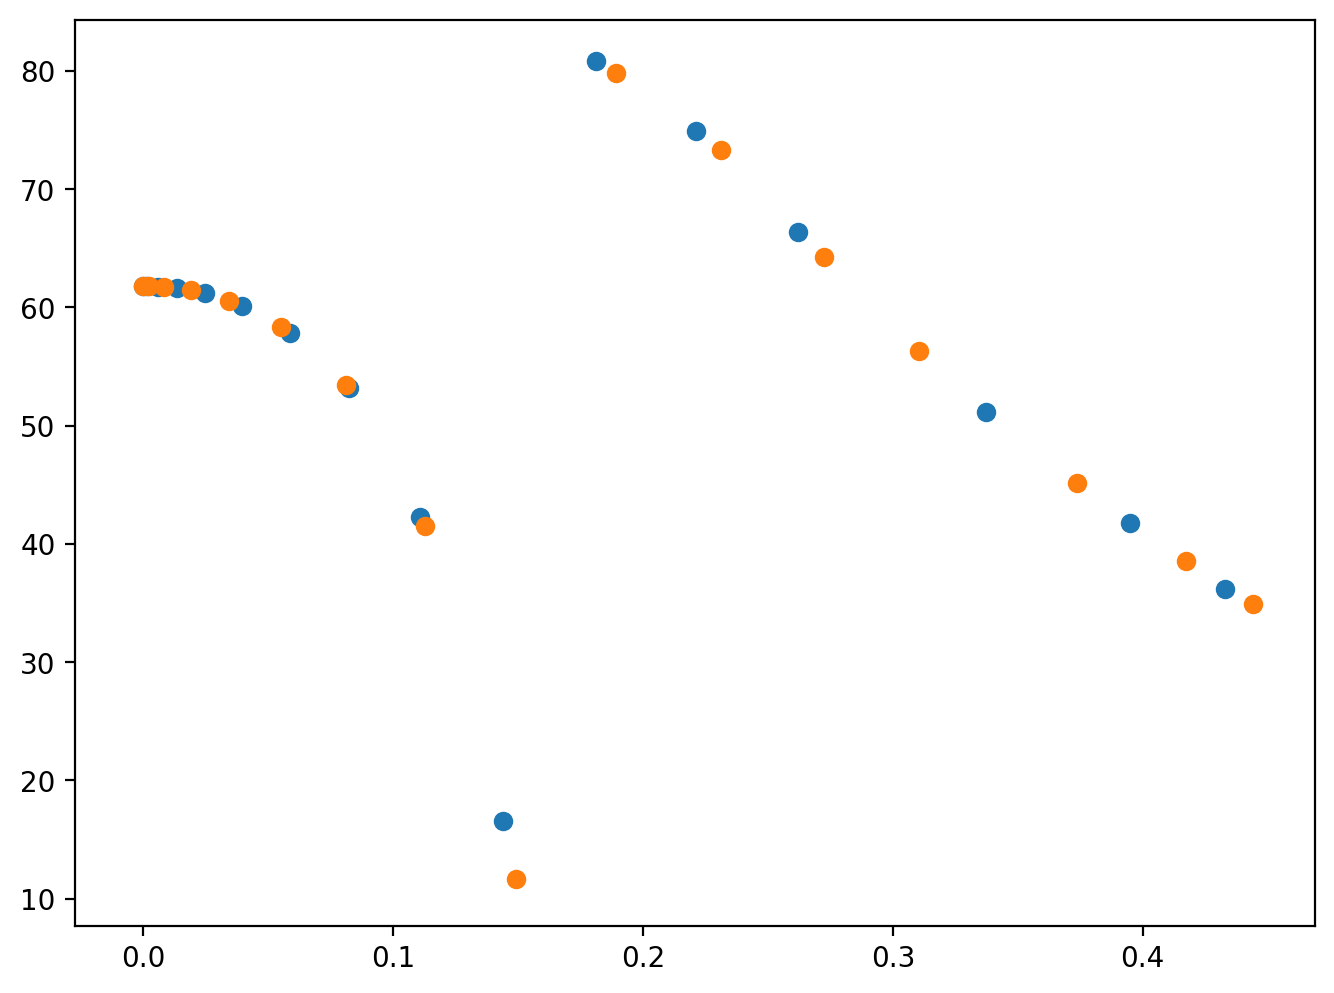

In [585]:
plt.scatter(*nonmatched_flutter(mat, 0))
plt.scatter(*nonmatched_flutter(mat, 1))

# Save in AEPW3 - Aeroelastic Cases

In [586]:

for i in aeroelastic_cases: #len(file_names)):
    
    if not os.path.isdir(path_to_aepw3 + '/06_DeformedWingFlutter/' + file_names[str(i)]['results']):
        os.makedirs(path_to_aepw3 + '/06_DeformedWingFlutter/' + file_names[str(i)]['results'])
    
    mat = scio.loadmat(path_to_mrm + '/' + file_names[str(i)]['mrm'] + '.mat')
    print('Processing {:s}'.format(file_names[str(i)]['mrm']))
    aoa = [5., 7.]
    for i_aoa in range(len(aoa)):
        # VELOCITY FREQUENCY
        vels, freq = frequency(mat, i_aoa)
        np.savetxt(path_to_aepw3 + '/06_DeformedWingFlutter/' + file_names[str(i)]['results'] + '/velocity_frequency_alpha{:04g}.txt'.format(aoa[i_aoa] * 100),
                  np.column_stack((vels, freq)))
        
        # STATIC DEFLECTION SPEED
        vels, deflection = static_deflection_speed(mat, i_aoa)
        np.savetxt(path_to_aepw3 + '/03_StaticAeroelastic/' + file_names[str(i)]['results'] + '_alpha{:04g}.txt'.format(aoa[i_aoa] * 100),
                  np.column_stack((vels, deflection)))
        
        # DEFORMED FLUTTER
        vf, deflection = matched_flutter(mat, i_aoa)
        np.savetxt(path_to_aepw3 + '/06_DeformedWingFlutter/' + file_names[str(i)]['results'] + '/flutter_speeds_alpha{:04g}.txt'.format(aoa[i_aoa] * 100),
                  np.column_stack((vf, deflection)))
        
        # NONMATCHED FLUTTER
        deflection, vf = nonmatched_flutter(mat, i_aoa)
        np.savetxt(path_to_aepw3 + '/06_DeformedWingFlutter/' + file_names[str(i)]['results'] + '/nonmatched_flutter_speeds_alpha{:04g}.txt'.format(aoa[i_aoa] * 100),
                  np.column_stack((deflection / 0.55, vf)))
        
#         # AERO FREQRESP
#         path = './06_LinUVLM/output/postprocess/{:s}'.format(file_names[str(i)]['results'])
#         try:
#             aero_freqresp(mat, aoa[i_aoa], i_aoa, path)
#         except KeyError:
#             pass
    # STRAIGHT WING FLUTTER
    vf, deflection = matched_flutter(mat, None)
    np.savetxt(path_to_aepw3 + '/06_DeformedWingFlutter/' + file_names[str(i)]['results'] + '/flutter_speeds_alpha{:04g}.txt'.format(0.),
              np.column_stack((vf, deflection)))

Processing aeroelastic_analysis_W_skin_UM_beam
Processing aeroelastic_analysis_WO_skin_UM_beam


In [471]:
import os
for i in range(len(file_names)-2, len(file_names)):
    
    if not os.path.isdir(path_to_aepw3 + '/06_DeformedWingFlutter/' + file_names[str(i)]['results']):
        os.makedirs(path_to_aepw3 + '/06_DeformedWingFlutter/' + file_names[str(i)]['results'])
    
    mat = scio.loadmat(path_to_mrm + '/' + file_names[str(i)]['mrm'] + '.mat')
    aoa = [5., 7.]
    for i_aoa in range(2):
        # AERO FREQRESP
        path = './06_LinUVLM/output/postprocess/{:s}'.format(file_names[str(i)]['results'])
        try:
            aero_freqresp(mat, aoa[i_aoa], i_aoa, path)
        except KeyError:
            pass

0.0
1.0
5.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.0
60.0
0.0
1.0
5.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.0
60.0
0.0
1.0
5.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.0
60.0
0.0
1.0
5.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.0
60.0
